# Visualization Code



## Installing and Importing Libraries

In [1]:
!pip install pyLDAvis
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.9 MB/s eta 0:00:00


In [2]:
from gensim.corpora import Dictionary
from gensim.models import LsiModel, Phrases, LdaModel, TfidfModel
from gensim.utils import simple_preprocess
import pyLDAvis.lda_model
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def doc_term_matrix(df):
    cv = CountVectorizer()

    # Form a document term matrix using the document column of df
    # dtm is a sparse matrix containing elements in the form: (row,col)->frequency
    dtm = cv.fit_transform(df['document'])

    # Print some info about our document-term matrix
    print("Total no. of documents:",dtm.shape[0])
    print("\nSize of the vocabulary:",dtm.shape[1],"\n")
    return cv, dtm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Reading the CSV File

In [4]:
df_clean = pd.read_csv("/content/drive/MyDrive/FYP/Data/train-test-data/train-clean-customstopwords.csv")
df_clean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


document  class
0      time movie tie rush lazy cash grab company exp...      0
1      visit spiritual center yesterday brahma kumari...      0
2      major belief system hindu bad describe name we...      0
3      yesterday possibly form group online expect ma...      0
4      salaam alaikum spiritual young man mormon memb...      1
...                                                  ...    ...
89869  despair seclude private consultation eld fathe...      1
89870  follow lengthy start paragraph turn proud form...      0
89871  party yesterday conversation friend wickedpixe...      0
89872  core belief islam iman acknowledge god sinceri...      1
89873  notice unsettling trend personal information v...      1

[89874 rows x 2 columns]

## Testing Code

In [5]:
from gensim.models import CoherenceModel

tokenized_data = df_clean['document'].apply(lambda x: simple_preprocess(x))
dictionary = Dictionary(tokenized_data)
print("Before removing extremes", len(dictionary))
dictionary.filter_extremes(no_below = 5, no_above = 0.50)
print("After removing extremes", len(dictionary))

corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Before removing extremes 141726
After removing extremes 33704


In [22]:
def train_lda_model(topic_numbers):
    if type(topic_numbers) == int:
        ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=topic_numbers, chunksize=2000, passes=10, iterations=20, alpha='auto', eta="auto", random_state=0)
        print(f"Topic {topic_numbers}")
        coherence_model = CoherenceModel(model=ldamodel, dictionary=dictionary, texts=tokenized_data, coherence='c_v')
        print("Coherence:", coherence_model.get_coherence(), "\n")
    elif len(topic_numbers) == 3:
        for i in range(topic_numbers[0], topic_numbers[1]+1, topic_numbers[2]):
            ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=i, chunksize=2000, passes=10, iterations=20, alpha='auto', eta="auto", random_state=0)
            print(f"Topic {i}")
            coherence_model = CoherenceModel(model=ldamodel, dictionary=dictionary, texts=tokenized_data, coherence='c_v')
            print("Coherence:", coherence_model.get_coherence(), "\n")
    return ldamodel

ldamodel = train_lda_model(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualizing Coherence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


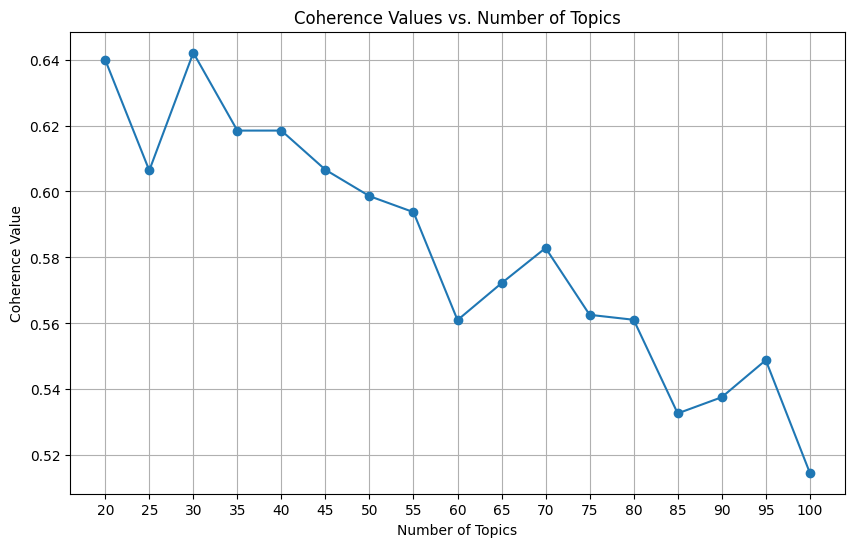

In [11]:
import matplotlib.pyplot as plt

# Topic numbers
topics = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Coherence values
coherence_values = [
    0.6398996677410737, 0.6063782839438948, 0.6420804748365493,
    0.6184686869849725, 0.6184718266811132, 0.6065832056139574,
    0.5985980095319914, 0.5937393233461904, 0.5610118377140786,
    0.5722025702246066, 0.5828755700377017, 0.5626081831713067,
    0.5611025905223836, 0.5327124502869839, 0.5376182530209684,
    0.548861498803203, 0.5147257716593263
]

# Plotting the coherence values
plt.figure(figsize=(10, 6))
plt.plot(topics, coherence_values, marker='o', linestyle='-')
plt.title('Coherence Values vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Value')
plt.xticks(topics)
plt.grid(True)
plt.show()

# pyLDAvis

## 100 Topics

In [17]:
from pyLDAvis import gensim
pyLDAvis.enable_notebook()

ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=100, chunksize=2000, passes=10, iterations=20, alpha='auto', eta="auto", random_state=0)
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.249104 -0.115321       1        1  14.416355
28    -0.217766 -0.003730       2        1   5.515991
15    -0.182751  0.046573       3        1   5.273764
94    -0.141952  0.164974       4        1   2.482814
66    -0.160922  0.188829       5        1   2.373591
...         ...       ...     ...      ...        ...
95     0.106869  0.018673      96        1   0.251310
37     0.101501  0.015584      97        1   0.248614
26     0.110194  0.007458      98        1   0.238472
2      0.110722  0.016417      99        1   0.225603
89     0.111597  0.008757     100        1   0.207111

[100 rows x 5 columns], topic_info=           Term          Freq         Total  Category  logprob  loglift
117         day  47396.000000  47396.000000   Default  30.0000  30.0000
164       allah  48742.000000  48742.000000   Default  29.0000  29.0000
591        love  29165.000000  29165.000000   Default  28.0000  28.0000
590        live  42879.000000  42879.000000   Default  27.0000  27.0000
57         work  33046.000000  33046.000000   Default  26.0000  26.0000
...         ...           ...           ...       ...      ...      ...
3868        max    501.394583    891.629685  Topic100  -3.4671   5.6040
4510      chief    408.366998    705.908734  Topic100  -3.6723   5.6324
10613  cardinal    294.611259    473.936517  Topic100  -3.9989   5.7043
1275     backup    189.492634    277.153077  Topic100  -4.4402   5.7995
469        dual    144.579707    245.509866  Topic100  -4.7107   5.6502

[5256 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
12575     59  0.991829     abaya
3216      24  0.997214     abbas
5308      37  0.993451       abc
2681      24  0.997234       abd
765       24  0.999263  abdullah
...      ...       ...       ...
4071      54  0.991654      zina
4071      66  0.006879      zina
9808      78  0.994409   zionist
7585      49  0.997457    zombie
3520      42  0.996403      zone

[12689 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 29, 16, 95, 67, 31, 21, 64, 36, 61, 53, 84, 50, 58, 17, 1, 37, 13, 99, 20, 55, 93, 71, 62, 15, 30, 45, 92, 23, 48, 98, 49, 41, 54, 65, 24, 80, 69, 81, 42, 97, 91, 57, 8, 4, 100, 68, 32, 5, 2, 77, 22, 14, 86, 70, 72, 46, 35, 76, 66, 88, 44, 74, 82, 83, 60, 18, 43, 73, 78, 11, 56, 19, 34, 40, 59, 51, 75, 9, 6, 33, 94, 39, 12, 47, 87, 79, 52, 26, 63, 85, 89, 25, 28, 10, 96, 38, 27, 3, 90])

## 10 Topics

In [16]:
from pyLDAvis import gensim
pyLDAvis.enable_notebook()

ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, chunksize=2000, passes=10, iterations=20, alpha='auto', eta="auto", random_state=0)
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.071640  0.087078       1        1  20.907853
1      0.150212 -0.015505       2        1  15.610943
0     -0.065864  0.040896       3        1  13.820756
2      0.228906 -0.085238       4        1   9.719058
3      0.095081 -0.017110       5        1   9.655482
5      0.199264 -0.074570       6        1   9.094592
6     -0.081235  0.163489       7        1   8.747955
4     -0.153664  0.057329       8        1   5.007836
7     -0.264616 -0.338886       9        1   4.135194
9     -0.179724  0.182515      10        1   3.300331, topic_info=        Term          Freq         Total Category  logprob  loglift
164    allah  50753.000000  50753.000000  Default  30.0000  30.0000
590     live  43290.000000  43290.000000  Default  29.0000  29.0000
930      god  42553.000000  42553.000000  Default  28.0000  28.0000
205   muslim  49771.000000  49771.000000  Default  27.0000  27.0000
103    islam  36603.000000  36603.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
638    halal   1188.117119   2903.086104  Topic10  -5.3729   2.5177
4692     red   1064.986895   2004.566320  Topic10  -5.4823   2.7787
1644  minute   1293.021737   6160.701280  Topic10  -5.2883   1.8499
265      mix   1027.591804   2087.730915  Topic10  -5.5181   2.7023
763    white   1056.289522   3755.975084  Topic10  -5.4905   2.1426

[711 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
765       4  0.998992   abdullah
2933      6  0.998856    abraham
6946      2  0.997632  abrahamic
767       4  0.999872        abu
5410      1  0.998316    abusive
...     ...       ...        ...
230       5  0.029643      young
230       6  0.033616      young
230       7  0.041868      young
230       8  0.012377      young
230       9  0.008557      young

[1789 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 1, 3, 4, 6, 7, 5, 8, 10])

## 50 Topics

In [18]:
from pyLDAvis import gensim
pyLDAvis.enable_notebook()

ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=50, chunksize=2000, passes=10, iterations=20, alpha='auto', eta="auto", random_state=0)
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
48    -0.201193 -0.165224       1        1  10.313297
28    -0.090869 -0.179624       2        1   9.749080
30     0.002542 -0.171339       3        1   3.458256
26     0.139794 -0.109693       4        1   3.313832
46     0.100462 -0.172397       5        1   3.274447
15     0.142121 -0.146350       6        1   3.214946
33     0.129243 -0.167039       7        1   2.832558
40    -0.212770 -0.033100       8        1   2.802983
18    -0.082000 -0.105590       9        1   2.743605
36    -0.210108  0.003821      10        1   2.570464
27    -0.046308 -0.093310      11        1   2.500879
16     0.144739 -0.090977      12        1   2.497818
38    -0.013070 -0.115536      13        1   2.436330
23    -0.104368 -0.063759      14        1   2.403834
3     -0.030976 -0.062690      15        1   2.329509
37     0.047759 -0.051218      16        1   2.215178
39     0.164587 -0.114735      17        1   2.189698
1      0.174495 -0.124813      18        1   2.179193
6     -0.219970 -0.019269      19        1   2.098011
17     0.098941 -0.101786      20        1   2.068667
13    -0.135261 -0.003118      21        1   2.067687
7      0.069553 -0.020383      22        1   1.985580
44    -0.068458  0.088030      23        1   1.942168
24    -0.223519 -0.040944      24        1   1.895990
4     -0.150024  0.013320      25        1   1.758467
49     0.071179 -0.054032      26        1   1.632952
22    -0.137341  0.061944      27        1   1.497589
19    -0.079269  0.106436      28        1   1.409132
10    -0.009897  0.002030      29        1   1.374939
41     0.166908 -0.050996      30        1   1.355635
42    -0.046281  0.036322      31        1   1.343900
35    -0.131043  0.048840      32        1   1.307392
8     -0.045144  0.049678      33        1   1.183987
43    -0.147182  0.016496      34        1   1.163479
45     0.020778  0.083422      35        1   1.151458
31     0.044090  0.016515      36        1   1.128459
47     0.114492  0.060206      37        1   0.961818
12     0.042649  0.078914      38        1   0.946764
29     0.117371 -0.067734      39        1   0.871134
0     -0.047386  0.124088      40        1   0.813418
21    -0.034996  0.101237      41        1   0.674033
11     0.013222  0.193424      42        1   0.672722
20     0.140907  0.109128      43        1   0.631841
2      0.066376  0.015549      44        1   0.571339
25     0.069877  0.203532      45        1   0.441789
14     0.056250  0.115906      46        1   0.433883
9      0.086615  0.203277      47        1   0.432957
5      0.083870  0.191945      48        1   0.428103
34     0.066338  0.199697      49        1   0.410453
32     0.092278  0.201903      50        1   0.318346, topic_info=             Term          Freq         Total Category  logprob  loglift
164         allah  50743.000000  50743.000000  Default  30.0000  30.0000
930           god  42481.000000  42481.000000  Default  29.0000  29.0000
205        muslim  49582.000000  49582.000000  Default  28.0000  28.0000
590          live  44319.000000  44319.000000  Default  27.0000  27.0000
103         islam  36348.000000  36348.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
4487        blend    304.603991    492.692279  Topic50  -4.3954   5.2689
4090        greet    315.583142    571.628945  Topic50  -4.3600   5.1557
2665      strange    346.128521   1513.120302  Topic50  -4.2676   4.2747
12088   territory    215.815163    299.333969  Topic50  -4.7400   5.4227
13708  invitation    205.169674    322.370707  Topic50  -4.7906   5.2979

[3175 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
12575     16  0.989978     abaya
3216      12  0.985064     abbas
3216      30  0.012469     abbas
2024      30  0.998526     abdul
765       12  0.918876  abdullah
... 

## 80 Topics

In [19]:
from pyLDAvis import gensim
pyLDAvis.enable_notebook()

ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=80, chunksize=2000, passes=10, iterations=20, alpha='auto', eta="auto", random_state=0)
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
48    -0.227456  0.084999       1        1  11.910082
6     -0.217021  0.138599       2        1  10.920725
30    -0.228433 -0.046906       3        1   2.992715
15    -0.201841 -0.189785       4        1   2.535972
75    -0.157735 -0.113431       5        1   2.394158
...         ...       ...     ...      ...        ...
17     0.132894 -0.045915      76        1   0.300413
11     0.137049 -0.028485      77        1   0.293029
68     0.133713 -0.039410      78        1   0.285050
25     0.139280 -0.030842      79        1   0.274560
0      0.137421 -0.036249      80        1   0.271700

[80 rows x 5 columns], topic_info=          Term          Freq         Total Category  logprob  loglift
164      allah  50358.000000  50358.000000  Default  30.0000  30.0000
930        god  42640.000000  42640.000000  Default  29.0000  29.0000
117        day  46213.000000  46213.000000  Default  28.0000  28.0000
205     muslim  48865.000000  48865.000000  Default  27.0000  27.0000
590       live  44102.000000  44102.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1400     spell    409.341897    499.782367  Topic80  -3.9414   5.7086
7427       raw    398.111516    533.177375  Topic80  -3.9692   5.6161
4427  preserve    328.085089    808.711067  Topic80  -4.1627   5.0061
3868       max    308.860345    874.697283  Topic80  -4.2231   4.8672
1405      tone    263.424121    635.412812  Topic80  -4.3822   5.0277

[4595 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4847     73  0.995990    aaron
3216     10  0.997222    abbas
5308     19  0.993528      abc
2681     10  0.998096      abd
2024     10  0.996189    abdul
...     ...       ...      ...
4071     21  0.400370     zina
4071     40  0.598187     zina
9808     52  0.996119  zionist
7585     39  0.994909   zombie
3520     78  0.997776     zone

[12119 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[49, 7, 31, 16, 76, 21, 77, 22, 65, 17, 67, 19, 20, 62, 34, 9, 56, 6, 80, 55, 74, 72, 41, 64, 28, 33, 59, 78, 30, 50, 57, 61, 10, 38, 54, 60, 42, 51, 70, 2, 14, 71, 66, 53, 52, 11, 48, 5, 23, 13, 37, 79, 3, 29, 40, 63, 25, 39, 32, 45, 8, 46, 15, 47, 4, 73, 68, 58, 43, 35, 24, 27, 44, 75, 36, 18, 12, 69, 26, 1])

## 30 Topics

In [21]:
from pyLDAvis import gensim
pyLDAvis.enable_notebook()

ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=30, chunksize=2000, passes=10, iterations=20, alpha='auto', eta="auto", random_state=0)
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.054285 -0.037062       1        1  14.371095
26     0.082964  0.029972       2        1   7.918120
15     0.170660 -0.122962       3        1   5.748939
17     0.220499 -0.142147       4        1   4.707614
20     0.051558 -0.102517       5        1   4.377491
1      0.222408  0.036945       6        1   3.829213
23    -0.021135 -0.177870       7        1   3.736694
16     0.180460  0.123406       8        1   3.697235
8      0.041039  0.064494       9        1   3.641094
2      0.154677  0.182668      10        1   3.629047
5     -0.149447 -0.114072      11        1   3.321336
12     0.190794  0.142374      12        1   3.293698
19    -0.145871  0.096260      13        1   3.179937
21     0.124497 -0.128306      14        1   3.158975
4     -0.161301  0.004540      15        1   2.992786
0     -0.016576 -0.210935      16        1   2.512620
13    -0.129388 -0.009850      17        1   2.510276
27    -0.023533  0.006075      18        1   2.357162
18    -0.162713  0.007772      19        1   2.265084
25    -0.021706  0.110400      20        1   2.243825
22    -0.171505  0.117273      21        1   2.229101
7     -0.160410  0.000180      22        1   2.227214
3      0.180927 -0.033965      23        1   2.217038
14     0.037723  0.120514      24        1   1.833713
28     0.042518 -0.118840      25        1   1.814890
11    -0.043612 -0.053297      26        1   1.485807
9     -0.176235 -0.090543      27        1   1.461838
24    -0.085695  0.237388      28        1   1.457326
10    -0.055356  0.149640      29        1   1.128631
29    -0.121955 -0.087534      30        1   0.652201, topic_info=         Term          Freq         Total Category  logprob  loglift
164     allah  52031.000000  52031.000000  Default  30.0000  30.0000
930       god  42621.000000  42621.000000  Default  29.0000  29.0000
205    muslim  49813.000000  49813.000000  Default  28.0000  28.0000
590      live  44105.000000  44105.000000  Default  27.0000  27.0000
103     islam  36564.000000  36564.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
318      plan    536.722570  10011.225893  Topic30  -4.5461   2.1066
2098   return    437.912823   4892.106001  Topic30  -4.7496   2.6192
1129    total    382.626521   2353.143102  Topic30  -4.8846   3.2161
1088  expense    343.598524   1452.404353  Topic30  -4.9921   3.5911
2002     term    338.095520   4889.679431  Topic30  -5.0083   2.3610

[2037 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3216      8  0.998338     abbas
2681      8  0.998096       abd
765       8  0.998911  abdullah
3313      8  0.998715       abi
2933     12  0.998362   abraham
...     ...       ...       ...
2613      8  0.998121     yusuf
6751     15  0.157703   zealand
6751     22  0.840676   zealand
9808      4  0.995999   zionist
7585     18  0.995367    zombie

[6589 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 27, 16, 18, 21, 2, 24, 17, 9, 3, 6, 13, 20, 22, 5, 1, 14, 28, 19, 26, 23, 8, 4, 15, 29, 12, 10, 25, 11, 30])

# Coherence Visualizations (Islamic Posts only)

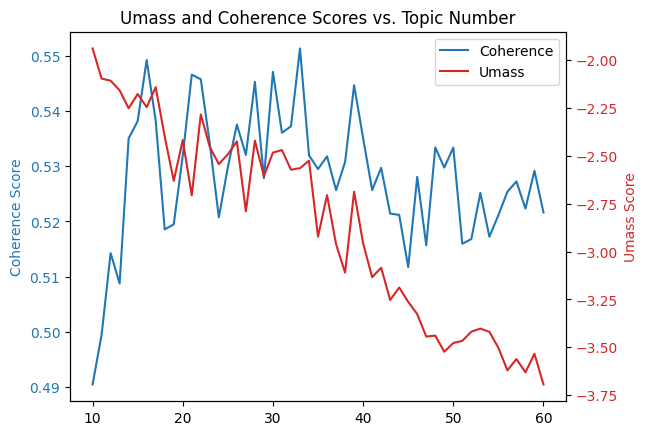

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
# passes = 10
# iterations = 20
# chunk_size = 2000
# no_below = 5
# no_above = 0.5
# alpha = "auto"
# eta = "auto"

data = [
    [10, -1.9405696802525347, 0.4904240198819808], [11, -2.0974687277531223, 0.4993992290157489], [12, -2.1087365176244894, 0.514236233419541], [13, -2.158981295964271, 0.5087385055919259], [14, -2.25257397513395, 0.535045050789357],
    [15, -2.178417253931349, 0.5381747868334679], [16, -2.246541257798923, 0.5492464749338549], [17, -2.1424591914904956, 0.5382422744534969], [18, -2.4001598510681115, 0.5185423534017501], [19, -2.63118687301521, 0.5194552095588424],
    [20, -2.4179739956980657, 0.5319058414022619], [21, -2.7071107088513977, 0.5465990563209294], [22, -2.284675999025186, 0.5457609740724982], [23, -2.4547219511522997, 0.5340583209687182], [24, -2.544017824918211, 0.5207316861843554],
    [25, -2.4928078502131332, 0.5298186803925565], [26, -2.4253109973875535, 0.5375415570496346], [27, -2.7902694474647833, 0.532042695676039], [28, -2.4210817185527835, 0.5452838417751588], [29, -2.606389558611956, 0.5278124817788408],
    [30, -2.4837378261766814, 0.5471015529069309], [31, -2.4707096468103873, 0.5360496579118998], [32, -2.5731112494779724, 0.5372441137681097], [33, -2.5651904779902432, 0.5513474494075687], [34, -2.5259754093091353, 0.5319573107669545],
    [35, -2.922235322574978, 0.5294858088216144], [36, -2.7053675779549105, 0.5317879353854407], [37, -2.9614478344546518, 0.5256599661505674], [38, -3.110268811463625, 0.5307510121768557], [39, -2.688065329888073, 0.5446851377513894],
    [40, -2.956824912309464, 0.5350972160383418], [41, -3.133772432828247, 0.5256747266012854], [42, -3.0844211132220667, 0.5297086845544959], [43, -3.252852680139935, 0.5214120807616893], [44, -3.1878550480061463, 0.5211686060177922],
    [45, -3.262505547619564, 0.5116998402868255], [46, -3.3264864292390734, 0.5280789507801093], [47, -3.4437272677854185, 0.5156563906423507], [48, -3.4387035502895235, 0.5334114717842182], [49, -3.5230445722839894, 0.5297555117911559],
    [50, -3.477524361781936, 0.5333757003466955], [51, -3.4661692101661684, 0.5159446977040957], [52, -3.418329903994609, 0.516785983857615], [53, -3.4021484912206473, 0.5251650731925017], [54, -3.4190720854718953, 0.517216870827963],
    [55, -3.5024159861345053, 0.5211262257590752], [56, -3.620126754900023, 0.5253716149270496], [57, -3.561008949334918, 0.527236822352012], [58, -3.6305386228217314, 0.522315010348727], [59, -3.5334898197177433, 0.5291763073641859],
    [60, -3.693758679111872, 0.5216054631843047],
]

# Extract Umass and Coherence scores into separate lists
topic_numbers = [item[0] for item in data]
umass_scores = [item[1] for item in data]
coherence_scores = [item[2] for item in data]

# Create subplots
fig, ax1 = plt.subplots()

# Plot Coherence scores
ax1.plot(topic_numbers, coherence_scores, color='tab:blue', label='Coherence')
ax1.set_ylabel('Coherence Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Umass scores
ax2 = ax1.twinx()
ax2.plot(topic_numbers, umass_scores, color='tab:red', label='Umass')
ax2.set_xlabel('Topic Number')
ax2.set_ylabel('Umass Score', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Title and show the plot
plt.title('Umass and Coherence Scores vs. Topic Number')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# passes = 10
# iterations = 50
# chunk_size = 2000
# no_below = 5
# no_above = 0.5
# alpha = "auto"
# eta = "auto"

Topic 40
Umass: -2.6331791620823326
Coherence: 0.5572312749497849

Topic 41
Umass: -2.9336153091039927
Coherence: 0.5238781487134959

Topic 42
Umass: -2.7173395067644757
Coherence: 0.5423640581117527

Topic 43
Umass: -3.0191155239488237
Coherence: 0.516623209049752

Topic 44
Umass: -3.516822816623151
Coherence: 0.5196965201310799

Topic 45
Umass: -3.057068984981343
Coherence: 0.5316067275821932

Topic 46
Umass: -2.9532616666441074
Coherence: 0.5339374954108171

Topic 47
Umass: -3.151911319934246
Coherence: 0.5243103456741657

Topic 48
Umass: -3.290087688361906
Coherence: 0.5183428628741625

Topic 49
Umass: -2.991469093445705
Coherence: 0.5236493678568815

Topic 50
Umass: -3.2199765964715796
Coherence: 0.5296407976499045


fig, ax1 = plt.subplots()

# Plot coherence data on the first axis (left)
x_values, y_values = zip(*coherence_data)
ax1.plot(x_values, y_values, color='tab:blue')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color='tab:blue')

ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot Umass data on the second axis (right)
x_values, y_values = zip(*umass_data)
ax2.plot(x_values, y_values, color='tab:red')
ax2.set_ylabel('Umass Score', color='tab:red')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


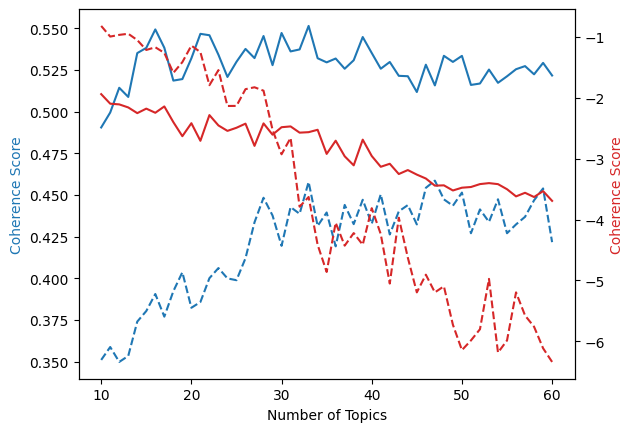

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This compares two sets of graphs, one with raw data, the other with the following applied + cleaning:
# passes = 10
# iterations = 50
# chunk_size = 2000
# no_below = 5
# no_above = 0.5
# alpha = "auto"
# eta = "auto"


data = [
    [10, -1.9405696802525347, 0.4904240198819808],
    [11, -2.0974687277531223, 0.4993992290157489],
    [12, -2.1087365176244894, 0.514236233419541],
    [13, -2.158981295964271, 0.5087385055919259],
    [14, -2.25257397513395, 0.535045050789357],
    [15, -2.178417253931349, 0.5381747868334679],
    [16, -2.246541257798923, 0.5492464749338549],
    [17, -2.1424591914904956, 0.5382422744534969],
    [18, -2.4001598510681115, 0.5185423534017501],
    [19, -2.63118687301521, 0.5194552095588424],
    [20, -2.4179739956980657, 0.5319058414022619],
    [21, -2.7071107088513977, 0.5465990563209294],
    [22, -2.284675999025186, 0.5457609740724982],
    [23, -2.4547219511522997, 0.5340583209687182],
    [24, -2.544017824918211, 0.5207316861843554],
    [25, -2.4928078502131332, 0.5298186803925565],
    [26, -2.4253109973875535, 0.5375415570496346],
    [27, -2.7902694474647833, 0.532042695676039],
    [28, -2.4210817185527835, 0.5452838417751588],
    [29, -2.606389558611956, 0.5278124817788408],
    [30, -2.4837378261766814, 0.5471015529069309],
    [31, -2.4707096468103873, 0.5360496579118998],
    [32, -2.5731112494779724, 0.5372441137681097],
    [33, -2.5651904779902432, 0.5513474494075687],
    [34, -2.5259754093091353, 0.5319573107669545],
    [35, -2.922235322574978, 0.5294858088216144],
    [36, -2.7053675779549105, 0.5317879353854407],
    [37, -2.9614478344546518, 0.5256599661505674],
    [38, -3.110268811463625, 0.5307510121768557],
    [39, -2.688065329888073, 0.5446851377513894],
    [40, -2.956824912309464, 0.5350972160383418],
    [41, -3.133772432828247, 0.5256747266012854],
    [42, -3.0844211132220667, 0.5297086845544959],
    [43, -3.252852680139935, 0.5214120807616893],
    [44, -3.1878550480061463, 0.5211686060177922],
    [45, -3.262505547619564, 0.5116998402868255],
    [46, -3.3264864292390734, 0.5280789507801093],
    [47, -3.4437272677854185, 0.5156563906423507],
    [48, -3.4387035502895235, 0.5334114717842182],
    [49, -3.5230445722839894, 0.5297555117911559],
    [50, -3.477524361781936, 0.5333757003466955],
    [51, -3.4661692101661684, 0.5159446977040957],
    [52, -3.418329903994609, 0.516785983857615],
    [53, -3.4021484912206473, 0.5251650731925017],
    [54, -3.4190720854718953, 0.517216870827963],
    [55, -3.5024159861345053, 0.5211262257590752],
    [56, -3.620126754900023, 0.5253716149270496],
    [57, -3.561008949334918, 0.527236822352012],
    [58, -3.6305386228217314, 0.522315010348727],
    [59, -3.5334898197177433, 0.5291763073641859],
    [60, -3.693758679111872, 0.5216054631843047],
]


# Extract Umass and Coherence scores into separate lists
topic_numbers = [item[0] for item in data]
umass_scores = [item[1] for item in data]
coherence_scores = [item[2] for item in data]


coherence_data = [
  [10, 0.35096634356236667],
  [11, 0.3587089500711518],
  [12, 0.3497645810339473],
  [13, 0.3533556250976544],
  [14, 0.3739580356343641],
  [15, 0.3803072752536293],
  [16, 0.3905154642400891],
  [17, 0.37692290190208055],
  [18, 0.3921931633462796],
  [19, 0.4035385333121115],
  [20, 0.3822504786332524],
  [21, 0.3856965130269399],
  [22, 0.4000015936917303],
  [23, 0.4060802467433634],
  [24, 0.3998720743391833],
  [25, 0.3987904768972845],
  [26, 0.4119689650962346],
  [27, 0.4335279753777661],
  [28, 0.4482564778271955],
  [29, 0.4376082498570493],
  [30, 0.4194110929800448],
  [31, 0.4426649528378429],
  [32, 0.43862939034806325],
  [33, 0.45773928101254124],
  [34, 0.43135653584373723],
  [35, 0.43941833550670567],
  [36, 0.41909741938055206],
  [37, 0.4439511339647633],
  [38, 0.4324342558203298],
  [39, 0.4470497236240907],
  [40, 0.4326264478658544],
  [41, 0.4503124109527824],
  [42, 0.4262263058631567],
  [43, 0.4400994247113731],
  [44, 0.4438535587835139],
  [45, 0.4322562582040103],
  [46, 0.4542065624263123],
  [47, 0.458533632120059],
  [48, 0.4472917410080852],
  [49, 0.44346834637473936],
  [50, 0.45136464858127445],
  [51, 0.4269669478334743],
  [52, 0.44126788862689437],
  [53, 0.4337551567104602],
  [54, 0.44734434758127424],
  [55, 0.4269669478334743],
  [56, 0.4322562582040103],
  [57, 0.4368229155771207],
  [58, 0.4467421428670553],
  [59, 0.45384448087717744],
  [60, 0.4216226550023434]
]

umass_data = [
  [10, -0.8197061940480669],
  [11, -0.9947006570415162],
  [12, -0.9669604106009971],
  [13, -0.9483236306960688],
  [14, -1.0521748058030063],
  [15, -1.2145563889637672],
  [16, -1.1703812950103067],
  [17, -1.2625982272497707],
  [18, -1.5911287261779012],
  [19, -1.4143983564439992],
  [20, -1.1429526932987215],
  [21, -1.250315354308526],
  [22, -1.7932624678360822],
  [23, -1.545610444737538],
  [24, -2.1349273370916193],
  [25, -2.1335834047988484],
  [26, -1.8588172146195774],
  [27, -1.8276785927636754],
  [28, -1.8836575288668798],
  [29, -2.5260541310975553],
  [30, -2.928424450366839],
  [31, -2.6594425631772936],
  [32, -3.7892158808111835],
  [33, -3.6301131069357124],
  [34, -4.4155390429938075],
  [35, -4.861704834488187],
  [36, -4.052804270541945],
  [37, -4.42935155348881],
  [38, -4.2229768456935695],
  [39, -4.4145470472778],
  [40, -3.8139200568066243],
  [41, -4.24052373494538],
  [42, -5.051854636910996],
  [43, -3.9698141005072713],
  [44, -4.626150699399951],
  [45, -5.197105745879177],
  [46, -4.9064916833013],
  [47, -5.197105745879177],
  [48, -5.097534779379325],
  [49, -5.728938036039975],
  [50, -6.145634385734349],
  [51, -5.9869263511805215],
  [52, -5.802500152282436],
  [53, -4.975554432474347],
  [54, -6.185972503047826],
  [55, -5.9869263511805215],
  [56, -5.197105745879177],
  [57, -5.576869063233236],
  [58, -5.761699762942708],
  [59, -6.115330369647654],
  [60, -6.339647510000521]
]

fig, ax1 = plt.subplots()

# Plot coherence data on the first axis (left)
x_values, y_values = zip(*coherence_data)
ax1.plot(x_values, y_values, color='tab:blue', linestyle="--")
ax1.plot(x_values, coherence_scores, color='tab:blue')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color='tab:blue')

ax2 = ax1.twinx()

x_values, y_values = zip(*umass_data)
ax2.plot(x_values, y_values, color='tab:red', linestyle="--")
ax2.plot(x_values, umass_scores, color='tab:red')
ax2.set_xlabel('Number of Topics')
ax2.set_ylabel('Coherence Score', color='tab:red')

plt.show()

# pyLDAvis Visualizations (Islamic Posts only)

### Performing LDA on Raw Topics

In [ ]:
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.270315 -0.127409       1        1  18.190885
34     0.286224 -0.045661       2        1  14.876962
11     0.276189 -0.093115       3        1  11.464712
14     0.250946 -0.010335       4        1   7.120077
5      0.240316  0.016236       5        1   6.812907
12     0.214538  0.077543       6        1   4.593473
36     0.229032 -0.117388       7        1   3.757845
37     0.196078  0.143699       8        1   3.630456
1      0.228135  0.110530       9        1   3.501346
30     0.190769 -0.106692      10        1   3.037236
38     0.184795  0.034521      11        1   2.992382
16     0.201429 -0.026750      12        1   2.763084
22     0.185939  0.133057      13        1   2.143543
29     0.195516 -0.042786      14        1   1.683147
4      0.173949 -0.098218      15        1   1.596894
7      0.157834  0.152944      16        1   1.494851
18     0.156754  0.098899      17        1   1.353694
3      0.155239  0.077002      18        1   1.293612
13     0.003841 -0.272150      19        1   1.054140
21     0.148665  0.020785      20        1   0.991992
24     0.063255 -0.031018      21        1   0.923346
23     0.090951  0.026912      22        1   0.911109
17     0.013495  0.156409      23        1   0.688785
10    -0.076750 -0.252923      24        1   0.661276
15    -0.050858  0.056590      25        1   0.540383
19    -0.072518  0.083263      26        1   0.469339
26    -0.094128  0.015330      27        1   0.418849
2     -0.174755 -0.057252      28        1   0.326426
20    -0.207261 -0.007168      29        1   0.240624
32    -0.250634 -0.005495      30        1   0.177371
31    -0.284238 -0.000574      31        1   0.091932
0     -0.306976  0.010390      32        1   0.054709
33    -0.317852  0.008522      33        1   0.036353
25    -0.321639  0.008803      34        1   0.027861
8     -0.316416  0.007581      35        1   0.026501
39    -0.326264  0.010909      36        1   0.016834
35    -0.328175  0.011161      37        1   0.013323
6     -0.327504  0.010999      38        1   0.011439
28    -0.328769  0.011278      39        1   0.006529
27    -0.329466  0.011570      40        1   0.003773, topic_info=            Term           Freq          Total Category  logprob  loglift
1061         the  422893.000000  422893.000000  Default  30.0000  30.0000
1203         you   92862.000000   92862.000000  Default  29.0000  29.0000
1162          we   54692.000000   54692.000000  Default  28.0000  28.0000
751           of  232268.000000  232268.000000  Default  27.0000  27.0000
53         allah   60875.000000   60875.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
18    acquainted       0.003346      54.930159  Topic40 -11.6631   0.4788
19           act       0.003346    1883.325656  Topic40 -11.6631  -3.0560
20        action       0.003346     913.432415  Topic40 -11.6631  -2.3324
21      actively       0.003346     309.371951  Topic40 -11.6631  -1.2497
22        actual       0.003346    1088.518259  Topic40 -11.6631  -2.5077

[2522 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
9193       9  0.967915  aameen
6625      22  0.985241  aayaat
8072      23  0.976133     aba
2401       8  0.996604   abbas
3307       8  0.996866     abd
...      ...       ...     ...
5957      17  0.999423      ين
5958      17  0.995112      يه
44264     37  0.593324      ٱق
5964      17  0.999215      ٱل
5972      17  0.997741     ٱلل

[7152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 35, 12, 15, 6, 13, 37, 38, 2, 31, 39, 17, 23, 30, 5, 8, 19, 4, 14, 22, 25, 24, 18, 11, 16, 20, 27, 3, 21, 33, 32, 1, 34, 26, 9, 40, 36, 7, 29, 28])

### 40 Topics

In [ ]:
from pyLDAvis import gensim

# 40 topics, produced towards the end of phase 1. Has all processing applied to produce high coherence.
# Specifics are unknown sadly (this is what happens when you don't write it down immediately)

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
34     0.000326 -0.267683       1        1  16.425266
26     0.127754 -0.230028       2        1  11.358540
7     -0.098713 -0.126065       3        1   6.884482
14     0.036224 -0.100676       4        1   4.011874
0     -0.036388 -0.081010       5        1   3.863284
25    -0.143785 -0.131132       6        1   3.595761
22     0.039259 -0.149897       7        1   3.298725
4     -0.223207 -0.038264       8        1   3.204654
6     -0.217716  0.039008       9        1   3.073854
9      0.112104 -0.080675      10        1   3.072204
12    -0.107437 -0.080434      11        1   2.412833
28    -0.136220 -0.052437      12        1   2.380580
18    -0.126161 -0.001125      13        1   2.289748
19    -0.111118 -0.060088      14        1   2.248971
10     0.112655 -0.131093      15        1   2.214644
17     0.173819 -0.111245      16        1   2.192781
21     0.119609 -0.119566      17        1   2.120639
27    -0.074008 -0.017208      18        1   1.879320
11    -0.187019  0.082044      19        1   1.852300
13     0.002933 -0.004985      20        1   1.421696
1      0.060780  0.087612      21        1   1.411321
30     0.043594  0.109151      22        1   1.404935
29     0.123509 -0.023429      23        1   1.391864
33     0.045392  0.027093      24        1   1.374053
32    -0.124139  0.027740      25        1   1.280980
37    -0.201798  0.079734      26        1   1.263592
3      0.099201 -0.067458      27        1   1.260947
2      0.142320  0.053429      28        1   1.229194
36     0.088894  0.035113      29        1   1.217937
20     0.158537  0.114550      30        1   1.067409
35     0.009855  0.040171      31        1   1.027606
38     0.002861  0.035127      32        1   0.865716
39     0.092728  0.083003      33        1   0.797018
5      0.111936  0.177869      34        1   0.758506
23     0.012789  0.168110      35        1   0.746301
24     0.068219  0.154973      36        1   0.697523
16     0.019194  0.110273      37        1   0.679596
31     0.039474  0.172179      38        1   0.661546
8     -0.125848  0.135462      39        1   0.560854
15     0.069592  0.141857      40        1   0.500947, topic_info=         Term          Freq         Total Category  logprob  loglift
36      allah  53603.000000  53603.000000  Default  30.0000  30.0000
460    muslim  50394.000000  50394.000000  Default  29.0000  29.0000
391     islam  34410.000000  34410.000000  Default  28.0000  28.0000
551   prophet  19524.000000  19524.000000  Default  27.0000  27.0000
562     quran  22849.000000  22849.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
348     house    121.941423   3901.041288  Topic40  -4.9761   1.8310
3844     gift    108.878314   1523.900042  Topic40  -5.0894   2.6576
1684   family    121.037131  12092.680668  Topic40  -4.9836   0.6922
1463     wish    103.555970   3300.963232  Topic40  -5.1396   1.8346
901   country    105.943674   7163.305765  Topic40  -5.1168   1.0826

[2514 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
5116      26  0.977507    aaron
4117      36  0.983262   aayaat
9777      22  0.939140    aayah
11729     28  0.983382    abaya
1471       9  0.995312    abbas
...      ...       ...      ...
6768      17  0.697044     zina
6768      20  0.287287     zina
7439       5  0.991620  zionist
4668      15  0.988961     zuhr
2091       8  0.975529    zumar

[6345 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[35, 27, 8, 15, 1, 26, 23, 5, 7, 10, 13, 29, 19, 20, 11, 18, 22, 28, 12, 14, 2, 31, 30, 34, 33, 38, 4, 3, 37, 21, 36, 39, 40, 6, 24, 25, 17, 32, 9, 16])

### 50 Topics

In [ ]:
from pyLDAvis import gensim

# 50 topics after cleaning. Looks good. Supposed to be compared with the 40 topics visualization above. Same processing applied.
# Filter extremes has been applied here. To see what happened before it was applied, look at the visualization below this one.
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
26    -0.229731  0.075635       1        1  9.278091
34    -0.273882 -0.071543       2        1  7.897794
0     -0.113405 -0.032669       3        1  5.329476
14    -0.170833 -0.102947       4        1  4.440214
46    -0.219353 -0.011196       5        1  3.990883
7     -0.057831  0.258880       6        1  3.690848
48    -0.119784  0.111938       7        1  3.519478
4      0.019237  0.233540       8        1  3.110898
27    -0.133467 -0.006741       9        1  3.017878
25    -0.118054 -0.059712      10        1  3.012255
12    -0.153145  0.068799      11        1  2.979379
21    -0.175462 -0.048218      12        1  2.904044
6      0.082054  0.243162      13        1  2.756508
17    -0.104599  0.022545      14        1  2.642337
22    -0.154192 -0.097146      15        1  2.505585
45    -0.105741  0.039924      16        1  2.465656
18    -0.034883 -0.050188      17        1  2.067857
16    -0.075085 -0.159788      18        1  2.023992
5      0.032396  0.052600      19        1  2.002983
28    -0.032341 -0.083007      20        1  1.954382
8      0.111386  0.147335      21        1  1.780313
2     -0.071989  0.135930      22        1  1.734805
15     0.049484 -0.013295      23        1  1.660247
40     0.014646  0.229092      24        1  1.437546
19    -0.048682 -0.092454      25        1  1.338468
35    -0.064891 -0.085181      26        1  1.333798
41     0.038304 -0.036043      27        1  1.315711
20    -0.016762 -0.098638      28        1  1.229262
29    -0.070642  0.008270      29        1  1.228751
44     0.096738  0.228078      30        1  1.161214
33     0.011969 -0.052287      31        1  1.150213
3      0.000344  0.065169      32        1  1.130271
37     0.178977  0.028944      33        1  1.033076
32     0.063331  0.004619      34        1  0.981104
43     0.002799  0.012222      35        1  0.942803
10     0.096360 -0.025283      36        1  0.917933
36     0.050899 -0.048325      37        1  0.861920
23     0.081953  0.061167      38        1  0.801429
49     0.006016 -0.112985      39        1  0.782854
42     0.080923 -0.104788      40        1  0.774802
11     0.158093 -0.001336      41        1  0.765495
1      0.089960 -0.075858      42        1  0.746177
39     0.091355 -0.143829      43        1  0.621275
47     0.060866 -0.064030      44        1  0.605556
13     0.157768 -0.054130      45        1  0.522493
24     0.175095 -0.072110      46        1  0.478670
30     0.175166 -0.003447      47        1  0.408990
31     0.201534 -0.077515      48        1  0.299251
9      0.215854 -0.077486      49        1  0.209470
38     0.201245 -0.065671      50        1  0.155566, topic_info=            Term          Freq         Total Category  logprob  loglift
36         allah  51129.000000  51129.000000  Default  30.0000  30.0000
562        quran  22577.000000  22577.000000  Default  29.0000  29.0000
551      prophet  19129.000000  19129.000000  Default  28.0000  28.0000
318          god  17821.000000  17821.000000  Default  27.0000  27.0000
460       muslim  50941.000000  50941.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
6934       annul     30.310494     32.410527  Topic50  -5.1988   6.3989
12301       dhul    141.553302    173.957265  Topic50  -3.6576   6.2597
1450         war     94.780694   2015.430249  Topic50  -4.0587   3.4088
324        great    106.135339   6510.003181  Topic50  -3.9455   2.3495
10452  willingly     35.115850     84.641300  Topic50  -5.0516   5.5861

[3164 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
4116      33  0.972674      aas
4117      38  0.985204   aayaat
9777      47  0.955506    aayah
12450     38  0.954366      aba
11729     27  0.984315    abaya
...      ...       ...      ...
6768      22  0.722206     zina
7439       

### 50 Topics, without gensim filtering of extremes

In [ ]:
from pyLDAvis import gensim

# Perfect example of why we needed filter_extremes()
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
33     0.259504 -0.078304       1        1  13.870592
36     0.233770 -0.070174       2        1  10.336420
29     0.221428 -0.137414       3        1   6.445535
39     0.147857  0.119771       4        1   4.686579
40     0.159389  0.020850       5        1   4.414931
21     0.106863 -0.081636       6        1   4.080269
26     0.091970  0.189655       7        1   3.056258
43     0.009634  0.278240       8        1   2.998279
9      0.054015  0.266043       9        1   2.611107
7      0.110684  0.056558      10        1   2.392398
30     0.176370  0.095934      11        1   2.380156
37     0.097374 -0.085566      12        1   2.347159
2      0.133854 -0.145619      13        1   2.250229
24     0.136306 -0.089327      14        1   2.147435
34     0.109310 -0.025542      15        1   2.146823
38     0.020280  0.058854      16        1   1.996855
27     0.157410 -0.073635      17        1   1.867213
32     0.045609 -0.060862      18        1   1.834520
8      0.003529  0.145058      19        1   1.745869
46    -0.011581 -0.054055      20        1   1.698338
44     0.059151 -0.005198      21        1   1.653721
42     0.006284 -0.046869      22        1   1.553827
11    -0.014436  0.173929      23        1   1.542117
3     -0.085448  0.115647      24        1   1.483308
1      0.024038  0.048695      25        1   1.399660
41     0.041428 -0.054041      26        1   1.352835
6      0.008411  0.017794      27        1   1.264927
45    -0.018983 -0.035115      28        1   1.252146
25    -0.065477  0.139626      29        1   1.219001
0      0.042733 -0.069879      30        1   1.144329
35     0.011527 -0.104279      31        1   1.117933
18    -0.034035  0.135361      32        1   1.001175
19    -0.015335 -0.093061      33        1   0.987928
13     0.012773 -0.123865      34        1   0.974936
14    -0.041557 -0.015386      35        1   0.851386
15    -0.041625  0.133194      36        1   0.712503
10    -0.079832 -0.084308      37        1   0.600349
17    -0.147373 -0.010319      38        1   0.531923
28    -0.123661  0.014407      39        1   0.507971
49    -0.139788  0.005401      40        1   0.448101
16    -0.177500 -0.020298      41        1   0.444294
4     -0.145058 -0.055484      42        1   0.422708
5     -0.122972 -0.074616      43        1   0.416804
22    -0.167524 -0.057917      44        1   0.386829
47    -0.103547  0.022187      45        1   0.349501
23    -0.183827 -0.032391      46        1   0.332084
20    -0.162582 -0.057406      47        1   0.331637
31    -0.189469 -0.055561      48        1   0.292249
12    -0.212757 -0.068023      49        1   0.085892
48    -0.197136 -0.071055      50        1   0.030959, topic_info=           Term          Freq         Total Category  logprob  loglift
36        allah  47793.000000  47793.000000  Default  30.0000  30.0000
555     prophet  18203.000000  18203.000000  Default  29.0000  29.0000
463      muslim  49228.000000  49228.000000  Default  28.0000  28.0000
319         god  18839.000000  18839.000000  Default  27.0000  27.0000
566       quran  22489.000000  22489.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
17327       esa      5.632700      7.741485  Topic50  -5.2794   7.7622
10256  finished      5.564244      7.673029  Topic50  -5.2916   7.7589
7152       huda      4.615673      6.724458  Topic50  -5.4785   7.7040
6019     taqiya      4.394146      6.502931  Topic50  -5.5277   7.6883
17133      aita      4.013801      6.122586  Topic50  -5.6182   7.6580

[2970 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
5456       7  0.945560   aameen
9782      32  0.940991    aayah
12455     45  0.895617      aba
11734     31  0.983068    abaya
9740      32  0.963912   abbaas
...      ...       ...      ...
677

### 34 Topics

In [ ]:
from pyLDAvis import gensim

# 34 topics, no much to comment.
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
31     0.215229 -0.045783       1        1  12.805998
8      0.165468 -0.141164       2        1  11.303623
12     0.141627 -0.200536       3        1   7.492799
22    -0.098315 -0.106939       4        1   6.858386
11     0.196847  0.041216       5        1   4.999727
5      0.034565 -0.062624       6        1   3.795019
29     0.139877 -0.006507       7        1   3.432035
10    -0.050751 -0.096576       8        1   3.409329
24    -0.186425 -0.071398       9        1   3.118221
9      0.058199 -0.113905      10        1   2.952250
6      0.210279  0.023444      11        1   2.938693
7     -0.041701 -0.117172      12        1   2.850917
3      0.073692  0.099249      13        1   2.674037
13     0.007561 -0.011427      14        1   2.652682
1     -0.025719 -0.231885      15        1   2.645294
27     0.213302  0.018208      16        1   2.549126
14    -0.181821 -0.156012      17        1   2.298007
17    -0.066050 -0.148942      18        1   2.110003
0      0.088679  0.102693      19        1   1.982196
15     0.000074  0.039977      20        1   1.955529
18     0.068826  0.129021      21        1   1.761689
16    -0.138692 -0.083273      22        1   1.721708
23     0.035776  0.008582      23        1   1.694735
19    -0.217592 -0.016221      24        1   1.642105
28     0.092704  0.168890      25        1   1.615440
4     -0.110886  0.078965      26        1   1.417233
2     -0.083423  0.081935      27        1   1.363215
30     0.016365  0.144506      28        1   0.969987
26    -0.154438  0.071505      29        1   0.891121
25    -0.065300  0.196063      30        1   0.663390
32    -0.116841  0.130917      31        1   0.544697
20    -0.063942  0.171327      32        1   0.505859
21    -0.157173  0.103864      33        1   0.384953, topic_info=         Term          Freq         Total Category  logprob  loglift
34      allah  58028.000000  58028.000000  Default  30.0000  30.0000
365     islam  39564.000000  39564.000000  Default  29.0000  29.0000
432    muslim  51801.000000  51801.000000  Default  28.0000  28.0000
514   prophet  20774.000000  20774.000000  Default  27.0000  27.0000
301       god  17157.000000  17157.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2845     flag    131.348352    257.149179  Topic33  -4.6451   4.8880
606     sound    350.679673   2316.990126  Topic33  -3.6630   3.6717
1615    greek    116.291893    203.609785  Topic33  -4.7668   4.9997
1690  meaning    113.563481   1539.210379  Topic33  -4.7905   2.9531
699      word    102.640307   6781.466695  Topic33  -4.8917   1.3691

[2141 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
4148      9  0.005271          aan
4148     24  0.985712          aan
4271     22  0.973748        aaron
4170     22  0.979787          aba
8018     11  0.981097        abaya
...     ...       ...          ...
5391     29  0.575010         zina
7012     33  0.941628  zoroastrian
3239     24  0.983728         zuhd
3945     13  0.985910         zuhr
1935      4  0.978642        zumar

[6736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[32, 9, 13, 23, 12, 6, 30, 11, 25, 10, 7, 8, 4, 14, 2, 28, 15, 18, 1, 16, 19, 17, 24, 20, 29, 5, 3, 31, 27, 26, 33, 21, 22])

### 16 topics

In [ ]:
from pyLDAvis import gensim

# This was done to prove having a low amount of topics is bad. Only generalized topics have formed.
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.198014 -0.001394       1        1  14.522676
2     -0.108899 -0.167465       2        1  11.847726
12    -0.087204  0.159512       3        1  10.458831
0     -0.087772  0.151734       4        1   9.670834
7      0.154274 -0.070084       5        1   8.831185
1     -0.069791  0.148213       6        1   6.190135
4      0.197460  0.081248       7        1   5.817875
9     -0.066746 -0.167519       8        1   4.855848
6      0.275299  0.031648       9        1   4.616396
3     -0.012892 -0.204652      10        1   4.593063
13    -0.105417  0.078388      11        1   4.016780
10    -0.120173 -0.036889      12        1   3.888897
15    -0.065491 -0.158812      13        1   3.567894
11     0.089673  0.235979      14        1   2.940363
5     -0.095915  0.031030      15        1   2.655827
8      0.301608 -0.110937      16        1   1.525670, topic_info=         Term          Freq         Total Category  logprob  loglift
36      allah  55094.000000  55094.000000  Default  30.0000  30.0000
562     quran  23610.000000  23610.000000  Default  29.0000  29.0000
551   prophet  18198.000000  18198.000000  Default  28.0000  28.0000
2949     pray  14817.000000  14817.000000  Default  27.0000  27.0000
460    muslim  52497.000000  52497.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
176       day    382.897498  18043.210626  Topic16  -4.9456   0.3300
1082    jesus    267.634547   2665.581278  Topic16  -5.3037   1.8842
581    record    238.986969    924.119229  Topic16  -5.4170   2.8303
2268    enter    249.596119   2565.369918  Topic16  -5.3735   1.8527
460    muslim    263.158691  52497.344110  Topic16  -5.3206  -1.1130

[1138 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
4117       7  0.985353   aayaat
11729     11  0.982843    abaya
1471       9  0.995451    abbas
2093      14  0.973248  abbasid
2094       9  0.975441      abd
...      ...       ...      ...
6768       2  0.277815     zina
6768      11  0.719625     zina
7439       4  0.994725  zionist
4668      12  0.987271     zuhr
2091       7  0.977899    zumar

[3233 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 3, 13, 1, 8, 2, 5, 10, 7, 4, 14, 11, 16, 12, 6, 9])

# Hyper Parameter Optimization for Coherence (Brute Force)

> Add blockquote



In [ ]:
import tqdm

# Topics range
min_topics = 30
max_topics = 40
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameters
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
alpha.append('auto')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
beta.append('auto')

model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Umass': [],
                }


# Can take a long time to run
if True:
    # iterate through number of topics
    for k in tqdm.tqdm(topics_range):
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, chunksize=2000, passes=20, iterations=50, alpha=a, eta=b, random_state=0)

                umass= CoherenceModel(model=ldamodel, corpus=corpus, dictionary=dictionary, coherence='u_mass').get_coherence()
                cv = CoherenceModel(model=ldamodel, dictionary=dictionary, texts=tokenized_data, coherence='c_v').get_coherence()

                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                model_results['Umass'].append(umass)

                current_results_df = pd.DataFrame(model_results)
                current_results_df.to_csv('/content/lda_tuning_results.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/10 [00:00<?, ?it/s]